# Housing Price Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the test data

In [5]:
file_path = "housing.csv"

In [6]:
data = pd.read_csv(file_path)

In [7]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As ocean_proximity is a string.
Actually it is a categorical string variable.

In [9]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Missing Data Analysis: Identifying and Removing Missing Data

In [11]:
#check for missing values
missing_values = data.isnull().sum()

#calculating the percentage of missing data in each column
missing_percentage = (missing_values/len(data)) * 100

#displaying the missing data statistics
print("Missing values in each column\n", missing_values)
print("Percentage of missing data\n", missing_percentage)

Missing values in each column
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Percentage of missing data
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


Out of all the cases that we have, we can observe that the total_bedrooms is missing 207 values. Missing % of bedroom = 1.002907%

In [12]:
#remove rows with missing values
data_cleaned = data.dropna()

#verify that missing values have been removed
missing_values = data_cleaned.isnull().sum()
print("After cleaning, the missing values of the data are\n", missing_values)

After cleaning, the missing values of the data are
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Descriptive Statistics and Data Visualisation

In [13]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


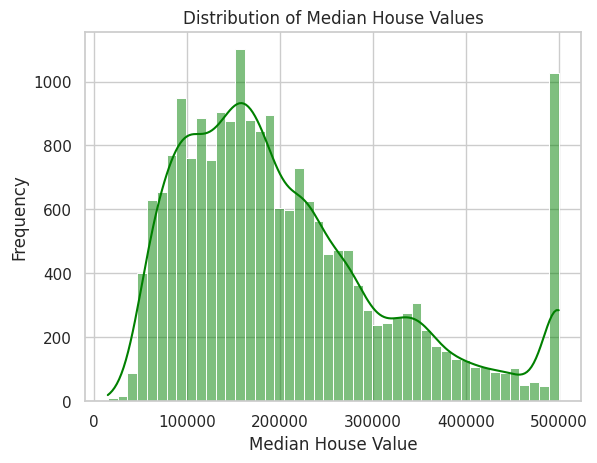

<Figure size 1000x600 with 0 Axes>

In [14]:
sns.set(style = 'whitegrid')
sns.histplot(data_cleaned['median_house_value'], color = 'green', kde = True)

plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.figure(figsize = (10, 6))
plt.show()

# Using InterQuartile Range (IQR) to remove outliers

In [17]:
# data = dataframe
# median_house_value = column of interest

Q1 = data_cleaned['median_house_value'].quantile(0.25)
print(Q1)

Q3 = data_cleaned['median_house_value'].quantile(0.75)
print(Q3)

IQR = Q3 - Q1

# define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers
mhv = 'median_house_value'
data_no_outliers_1 = data_cleaned[
    (data_cleaned[mhv] >= lower_bound)
    & (data_cleaned[mhv] <= upper_bound)]

# check the shape of the data before and after removal of outliers
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

119500.0
264700.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


# Outlier Detection 2: BoxPlot

## Outliers in Median Income

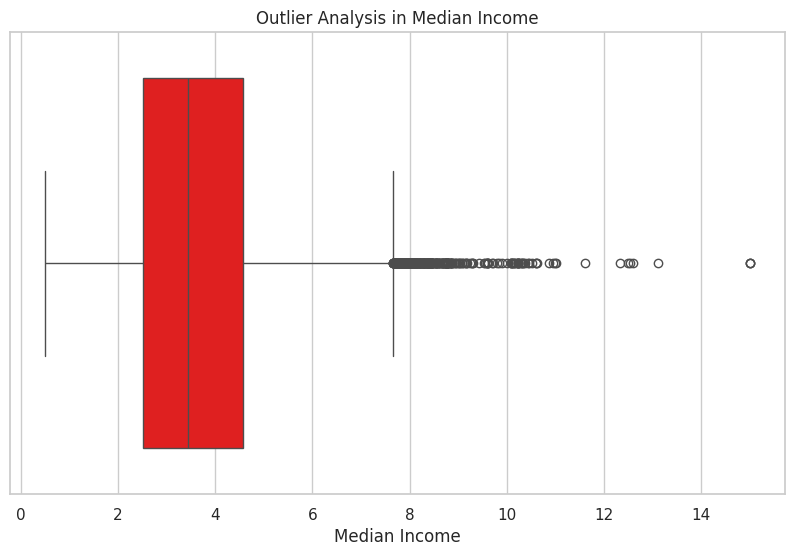

In [19]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = data_no_outliers_1['median_income'], color = 'red')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [20]:
# calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# define the bounds for the outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

#remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound)
 & (data_no_outliers_1['median_income'] <= upper_bound)]

# check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)


Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [21]:
data = data_no_outliers_2

# Correlation HeatMap

<ipython-input-22-f5296b10a7d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap='Greens')


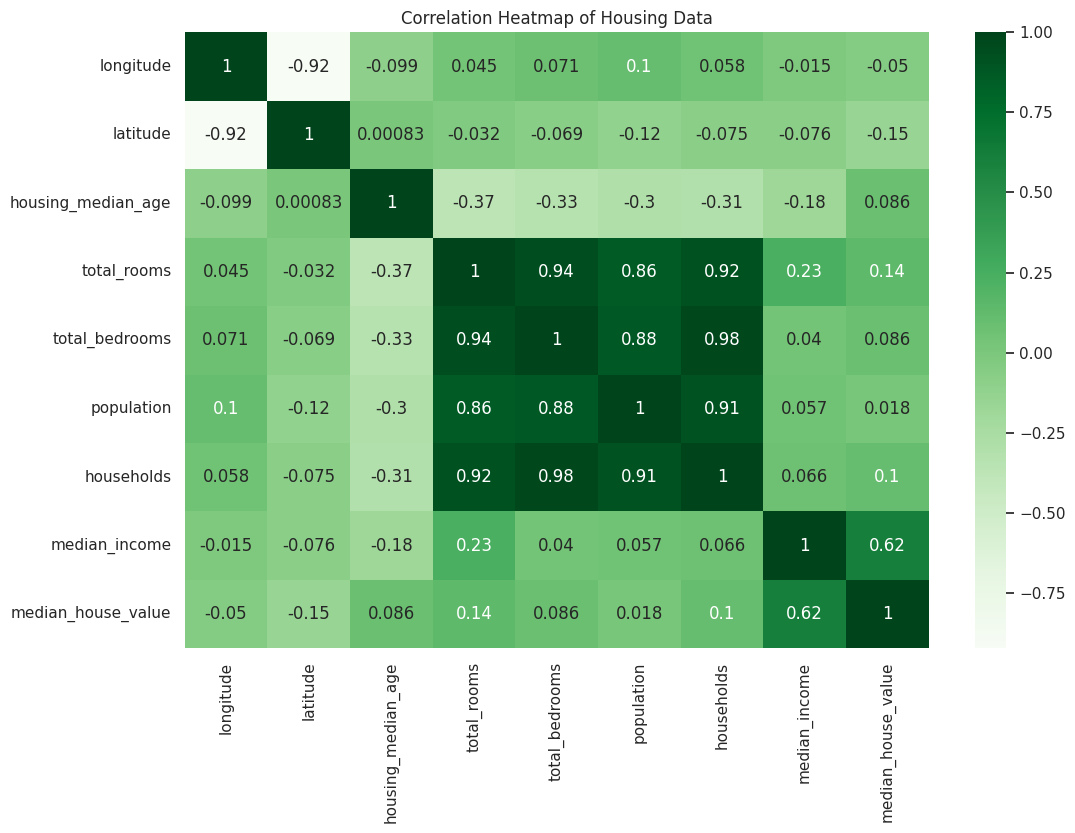

In [22]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [23]:
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [24]:
# unique value count fot categorical data
for column in ['ocean_proximity']:
  print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# String Data Categorization to Dummy Variables

In [25]:
ocean_proximity_dummies = pd.get_dummies(
    data['ocean_proximity'], prefix = 'ocean_proximity'
)

data = pd.concat(
    [data.drop("ocean_proximity", axis = 1), ocean_proximity_dummies],
    axis = 1
)

ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [26]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [27]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [28]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


# Splitting the Data into Train/Test

In [29]:
# define your features (independent variables) and target(dependent variables)

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'population', 'households', 'median_income',
            'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
            'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

target = ['median_house_value']

X = data[features]
y = data[target]

# split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random state ensures reproducibility of your split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1111)

# check the size of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"TEst set size: {X_test.shape[0]} samples")

Training set size: 15220 samples
TEst set size: 3806 samples


#Training

In [30]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [31]:
# adding a constant to the predictors because statsmodels' OLS doesn't include
# it by default

X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [32]:
# fit the ols model

model_fitted = sm.OLS(y_train, X_train_const).fit()

# printing summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:29:50   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Prediction
# Testing

In [35]:
# adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

In [36]:
X_test_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7322,1.0,-118.17,33.98,27.0,1871.0,2542.0,581.0,2.8427,1,0,0,0
465,1.0,-122.28,37.86,52.0,938.0,393.0,189.0,3.8594,0,0,1,0
12768,1.0,-121.43,38.61,40.0,1134.0,675.0,249.0,1.3696,0,1,0,0
2617,1.0,-124.11,40.93,25.0,2392.0,1298.0,461.0,3.5076,0,0,0,1
13351,1.0,-117.62,34.02,9.0,4265.0,2280.0,589.0,5.5632,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11691,1.0,-117.99,33.87,17.0,2334.0,1662.0,535.0,3.0147,1,0,0,0
1454,1.0,-121.96,37.96,28.0,1838.0,899.0,270.0,5.2145,0,1,0,0
7360,1.0,-118.19,33.96,28.0,3507.0,3740.0,970.0,2.0162,1,0,0,0
19118,1.0,-122.65,38.23,52.0,1923.0,910.0,345.0,3.4500,1,0,0,0


# Checking OLS Assumptions

# Assumption 1: Linearity

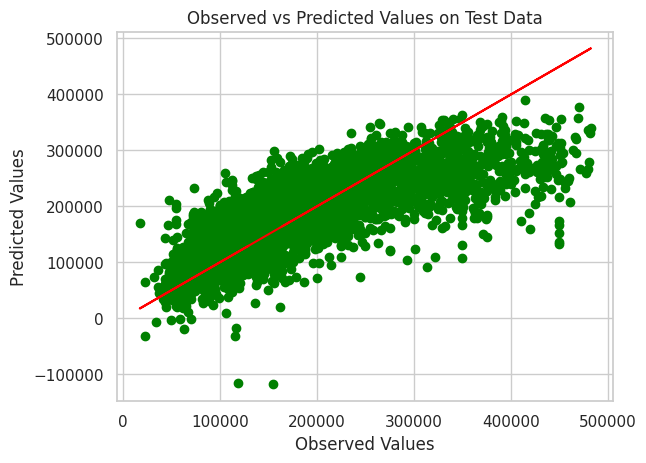

In [37]:
# scatter plot for observed vs predicted values on the test data

plt.scatter(y_test, test_predictions, color = 'green')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color = 'red') # prediction (true) values line
plt.show()

Positive Linear Relationship shown by the red line.
As actual values increases, the predicted values also increase.

# Assumption 2: Random Sampling

In [38]:
# calculate the mean of the residuals

mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals, 2)}")

The mean of the residuals is 0.0


While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

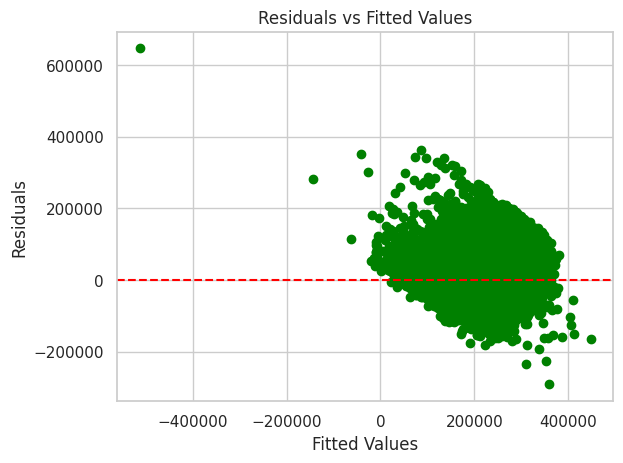

In [39]:
# plotting the residuals

plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = 'green')
plt.axhline(y=0, color = 'red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.

# Assumption 3: Exogeneity

In [42]:
# calculate the residuals
residuals = model_fitted.resid

# check for the correlation between residuals and each predictors
for column in X_train.columns:
  corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
  print(f"Correilation between residuals and {column}: {np.round(corr_coefficient, 2)}")

Correilation between residuals and longitude: -0.0
Correilation between residuals and latitude: 0.0
Correilation between residuals and housing_median_age: -0.0
Correilation between residuals and total_rooms: 0.0
Correilation between residuals and population: 0.0
Correilation between residuals and households: 0.0
Correilation between residuals and median_income: 0.0
Correilation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correilation between residuals and ocean_proximity_INLAND: 0.0
Correilation between residuals and ocean_proximity_NEAR BAY: -0.0
Correilation between residuals and ocean_proximity_NEAR OCEAN: 0.0


# Assumption 4: Homoscedasticity
Homoscedasticity, or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared. This is an important assumption of parametric statistical tests because they are sensitive to any dissimilarities. Uneven variances in samples result in biased and skewed test results.

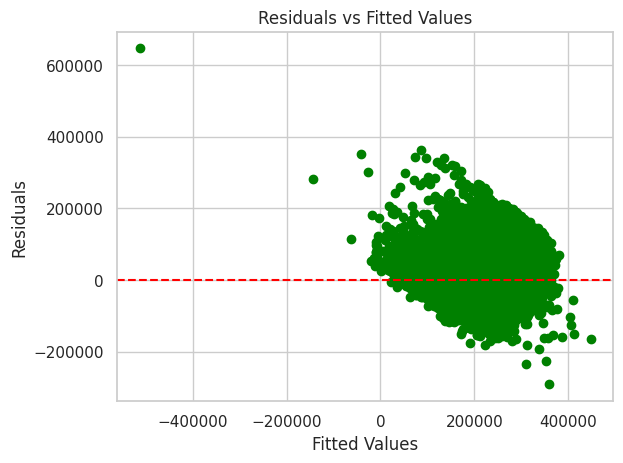

In [44]:
# plotting the residuals

plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = 'green')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Random Scatter: If plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.

Pattern or Shape: If residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticity, meaning variance of residuals changes with the level of the independent variables.

# Train/Test/Evaluation with Sklearn

# Scaling the Data

In [45]:
from sklearn.preprocessing import StandardScaler

# initialise the StandardScaler
scaler = StandardScaler()

# fit the scaler on the trainig data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# output the performance metrics
print(f"RMSE: {rmse}\nMSE: {mse}")

RMSE: 59405.88869441674
MSE: 3529059611.5734305


In [47]:
print(y_pred)

[[153414.2018804 ]
 [239312.04418031]
 [ 70054.78117497]
 ...
 [129935.7653883 ]
 [232846.31280863]
 [207120.21348536]]


In [48]:
print(y_test)

       median_house_value
7322             164400.0
465              196400.0
12768             65200.0
2617              73600.0
13351            195100.0
...                   ...
11691            217000.0
1454             229200.0
7360             142000.0
19118            200600.0
13084            129500.0

[3806 rows x 1 columns]


In [49]:
y_test

,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0
